# RNN and CONV1D for Sequence Problems

- Datasets used
  - imdb reviews
  - jena temperature data

Used code from **Deep Learning with Python**, you can also found the code [here](https://github.com/fchollet/deep-learning-with-python-notebooks).

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.edgecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'


/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Use LSTM for sentimental analysis on the imdb review data

# Use `conv1d` for sentimental analysis for the imdb review data

In [2]:
max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')


print('Pad sequences (sample x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


25000 train sequences
25000 test sequences
Pad sequences (sample x time)


Loading data...


In [3]:
import keras
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop, Adam

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2)

20000/20000 [==============================] - 45s 2ms/step - loss: 0.5894 - acc: 0.7987 - val_loss: 0.5917 - val_acc: 0.7312


19968/20000 [============================>.] - ETA: 0s - loss: 0.5895 - acc: 0.7987

19712/20000 [============================>.] - ETA: 0s - loss: 0.5898 - acc: 0.7982

19456/20000 [============================>.] - ETA: 1s - loss: 0.5902 - acc: 0.7979

19200/20000 [===========================>..] - ETA: 1s - loss: 0.5906 - acc: 0.7976

18944/20000 [===========================>..] - ETA: 2s - loss: 0.5908 - acc: 0.7975

18688/20000 [===========================>..] - ETA: 2s - loss: 0.5913 - acc: 0.7972

18432/20000 [==========================>...] - ETA: 3s - loss: 0.5917 - acc: 0.7969

18176/20000 [==========================>...] - ETA: 3s - loss: 0.5920 - acc: 0.7967

17920/20000 [=========================>....] - ETA: 4s - loss: 0.5921 - acc: 0.7972

17664/20000 [=========================>....] - ETA: 4s - loss: 0.5922 - acc: 0.7969

17408/20000 [=========================>....] - ETA: 5s - loss: 0.5924 - acc: 0.7968

17152/20000 [========================>.....] - ETA: 5s - loss: 0.5927 - acc: 0.7965

16896/20000 [========================>.....] - ETA: 6s - loss: 0.5928 - acc: 0.7967

16640/20000 [=======================>......] - ETA: 6s - loss: 0.5932 - acc: 0.7968

16384/20000 [=======================>......] - ETA: 7s - loss: 0.5935 - acc: 0.7962

16128/20000 [=======================>......] - ETA: 7s - loss: 0.5938 - acc: 0.7962

15872/20000 [======================>.......] - ETA: 8s - loss: 0.5940 - acc: 0.7962

15616/20000 [======================>.......] - ETA: 8s - loss: 0.5943 - acc: 0.7960

15360/20000 [======================>.......] - ETA: 9s - loss: 0.5945 - acc: 0.7962 

15104/20000 [=====================>........] - ETA: 10s - loss: 0.5946 - acc: 0.7960

14848/20000 [=====================>........] - ETA: 10s - loss: 0.5946 - acc: 0.7961

14592/20000 [====================>.........] - ETA: 11s - loss: 0.5949 - acc: 0.7963

14336/20000 [====================>.........] - ETA: 11s - loss: 0.5951 - acc: 0.7957

14080/20000 [====================>.........] - ETA: 12s - loss: 0.5952 - acc: 0.7964

13824/20000 [===================>..........] - ETA: 12s - loss: 0.5951 - acc: 0.7975

13568/20000 [===================>..........] - ETA: 13s - loss: 0.5955 - acc: 0.7987

13312/20000 [==================>...........] - ETA: 13s - loss: 0.5958 - acc: 0.7994

13056/20000 [==================>...........] - ETA: 14s - loss: 0.5960 - acc: 0.7994

12800/20000 [==================>...........] - ETA: 14s - loss: 0.5963 - acc: 0.7998

12544/20000 [=================>............] - ETA: 15s - loss: 0.5965 - acc: 0.8005

12288/20000 [=================>............] - ETA: 15s - loss: 0.5967 - acc: 0.8009

12032/20000 [=================>............] - ETA: 16s - loss: 0.5969 - acc: 0.8014

11776/20000 [================>.............] - ETA: 16s - loss: 0.5971 - acc: 0.8016

11520/20000 [================>.............] - ETA: 17s - loss: 0.5975 - acc: 0.8010

11264/20000 [===============>..............] - ETA: 17s - loss: 0.5977 - acc: 0.8010

11008/20000 [===============>..............] - ETA: 18s - loss: 0.5980 - acc: 0.8011

10752/20000 [===============>..............] - ETA: 19s - loss: 0.5981 - acc: 0.8015

10496/20000 [==============>...............] - ETA: 19s - loss: 0.5985 - acc: 0.8018

10240/20000 [==============>...............] - ETA: 20s - loss: 0.5987 - acc: 0.8023

 9984/20000 [=============>................] - ETA: 20s - loss: 0.5994 - acc: 0.8015

 9728/20000 [=============>................] - ETA: 21s - loss: 0.5999 - acc: 0.8014

 9472/20000 [=============>................] - ETA: 21s - loss: 0.6002 - acc: 0.8014

 9216/20000 [============>.................] - ETA: 22s - loss: 0.6008 - acc: 0.8005

 8960/20000 [============>.................] - ETA: 22s - loss: 0.6012 - acc: 0.7996

 8704/20000 [============>.................] - ETA: 23s - loss: 0.6013 - acc: 0.7988

 8448/20000 [===========>..................] - ETA: 23s - loss: 0.6015 - acc: 0.8008

 8192/20000 [===========>..................] - ETA: 24s - loss: 0.6018 - acc: 0.7999

 7936/20000 [==========>...................] - ETA: 25s - loss: 0.6018 - acc: 0.8004

 7680/20000 [==========>...................] - ETA: 25s - loss: 0.6018 - acc: 0.8009

 7424/20000 [==========>...................] - ETA: 26s - loss: 0.6020 - acc: 0.8012

 7168/20000 [=========>....................] - ETA: 26s - loss: 0.6023 - acc: 0.7998

 6912/20000 [=========>....................] - ETA: 27s - loss: 0.6024 - acc: 0.8005

 6656/20000 [========>.....................] - ETA: 27s - loss: 0.6026 - acc: 0.8020

 6400/20000 [========>.....................] - ETA: 28s - loss: 0.6030 - acc: 0.8022

 6144/20000 [========>.....................] - ETA: 28s - loss: 0.6035 - acc: 0.8039

 5888/20000 [=======>......................] - ETA: 29s - loss: 0.6040 - acc: 0.8059

 5632/20000 [=======>......................] - ETA: 30s - loss: 0.6046 - acc: 0.8061

 5376/20000 [=======>......................] - ETA: 30s - loss: 0.6049 - acc: 0.8065

 5120/20000 [======>.......................] - ETA: 31s - loss: 0.6056 - acc: 0.8064

 4864/20000 [======>.......................] - ETA: 31s - loss: 0.6059 - acc: 0.8074

 4608/20000 [=====>........................] - ETA: 32s - loss: 0.6060 - acc: 0.8064

 4352/20000 [=====>........................] - ETA: 33s - loss: 0.6058 - acc: 0.8114

 4096/20000 [=====>........................] - ETA: 33s - loss: 0.6064 - acc: 0.8105

 3840/20000 [====>.........................] - ETA: 34s - loss: 0.6073 - acc: 0.8091

 3584/20000 [====>.........................] - ETA: 35s - loss: 0.6070 - acc: 0.8100

 3328/20000 [===>..........................] - ETA: 36s - loss: 0.6074 - acc: 0.8092

 3072/20000 [===>..........................] - ETA: 37s - loss: 0.6070 - acc: 0.8115

 2816/20000 [===>..........................] - ETA: 37s - loss: 0.6074 - acc: 0.8082

 2560/20000 [==>...........................] - ETA: 38s - loss: 0.6081 - acc: 0.8063

 2304/20000 [==>...........................] - ETA: 39s - loss: 0.6086 - acc: 0.8038

 2048/20000 [==>...........................] - ETA: 39s - loss: 0.6089 - acc: 0.8037

 1792/20000 [=>............................] - ETA: 40s - loss: 0.6101 - acc: 0.8019

 1536/20000 [=>............................] - ETA: 41s - loss: 0.6104 - acc: 0.8047

 1280/20000 [>.............................] - ETA: 41s - loss: 0.6099 - acc: 0.8063

 1024/20000 [>.............................] - ETA: 41s - loss: 0.6103 - acc: 0.8096

  768/20000 [>.............................] - ETA: 41s - loss: 0.6108 - acc: 0.8073

  512/20000 [..............................] - ETA: 43s - loss: 0.6146 - acc: 0.7891

  256/20000 [..............................] - ETA: 44s - loss: 0.6118 - acc: 0.7891

Epoch 5/5


20000/20000 [==============================] - 46s 2ms/step - loss: 0.6348 - acc: 0.7653 - val_loss: 0.6405 - val_acc: 0.7094


19968/20000 [============================>.] - ETA: 0s - loss: 0.6349 - acc: 0.7651

19712/20000 [============================>.] - ETA: 0s - loss: 0.6350 - acc: 0.7652

19456/20000 [============================>.] - ETA: 1s - loss: 0.6351 - acc: 0.7653

19200/20000 [===========================>..] - ETA: 1s - loss: 0.6354 - acc: 0.7647

18944/20000 [===========================>..] - ETA: 2s - loss: 0.6356 - acc: 0.7643

18688/20000 [===========================>..] - ETA: 2s - loss: 0.6356 - acc: 0.7647

18432/20000 [==========================>...] - ETA: 3s - loss: 0.6358 - acc: 0.7649

18176/20000 [==========================>...] - ETA: 3s - loss: 0.6358 - acc: 0.7647

17920/20000 [=========================>....] - ETA: 4s - loss: 0.6360 - acc: 0.7643

17664/20000 [=========================>....] - ETA: 4s - loss: 0.6361 - acc: 0.7643

17408/20000 [=========================>....] - ETA: 5s - loss: 0.6362 - acc: 0.7647

17152/20000 [========================>.....] - ETA: 5s - loss: 0.6363 - acc: 0.7650

16896/20000 [========================>.....] - ETA: 6s - loss: 0.6364 - acc: 0.7649

16640/20000 [=======================>......] - ETA: 7s - loss: 0.6366 - acc: 0.7647

16384/20000 [=======================>......] - ETA: 7s - loss: 0.6365 - acc: 0.7654

16128/20000 [=======================>......] - ETA: 8s - loss: 0.6367 - acc: 0.7645

15872/20000 [======================>.......] - ETA: 8s - loss: 0.6369 - acc: 0.7644

15616/20000 [======================>.......] - ETA: 9s - loss: 0.6370 - acc: 0.7638

15360/20000 [======================>.......] - ETA: 9s - loss: 0.6372 - acc: 0.7639 

15104/20000 [=====================>........] - ETA: 10s - loss: 0.6375 - acc: 0.7632

14848/20000 [=====================>........] - ETA: 10s - loss: 0.6376 - acc: 0.7631

14592/20000 [====================>.........] - ETA: 11s - loss: 0.6378 - acc: 0.7631

14336/20000 [====================>.........] - ETA: 11s - loss: 0.6377 - acc: 0.7640

14080/20000 [====================>.........] - ETA: 12s - loss: 0.6380 - acc: 0.7649

13824/20000 [===================>..........] - ETA: 12s - loss: 0.6380 - acc: 0.7656

13568/20000 [===================>..........] - ETA: 13s - loss: 0.6380 - acc: 0.7657

13312/20000 [==================>...........] - ETA: 13s - loss: 0.6383 - acc: 0.7651

13056/20000 [==================>...........] - ETA: 14s - loss: 0.6383 - acc: 0.7653

12800/20000 [==================>...........] - ETA: 15s - loss: 0.6383 - acc: 0.7661

12544/20000 [=================>............] - ETA: 15s - loss: 0.6384 - acc: 0.7662

12288/20000 [=================>............] - ETA: 16s - loss: 0.6385 - acc: 0.7664

12032/20000 [=================>............] - ETA: 16s - loss: 0.6386 - acc: 0.7669

11776/20000 [================>.............] - ETA: 17s - loss: 0.6389 - acc: 0.7661

11520/20000 [================>.............] - ETA: 17s - loss: 0.6391 - acc: 0.7658

11264/20000 [===============>..............] - ETA: 18s - loss: 0.6394 - acc: 0.7649

11008/20000 [===============>..............] - ETA: 19s - loss: 0.6394 - acc: 0.7654

10752/20000 [===============>..............] - ETA: 19s - loss: 0.6396 - acc: 0.7652

10496/20000 [==============>...............] - ETA: 20s - loss: 0.6398 - acc: 0.7651

10240/20000 [==============>...............] - ETA: 20s - loss: 0.6400 - acc: 0.7651

 9984/20000 [=============>................] - ETA: 21s - loss: 0.6402 - acc: 0.7645

 9728/20000 [=============>................] - ETA: 21s - loss: 0.6406 - acc: 0.7630

 9472/20000 [=============>................] - ETA: 22s - loss: 0.6406 - acc: 0.7631

 9216/20000 [============>.................] - ETA: 22s - loss: 0.6408 - acc: 0.7633

 8960/20000 [============>.................] - ETA: 23s - loss: 0.6410 - acc: 0.7637

 8704/20000 [============>.................] - ETA: 23s - loss: 0.6415 - acc: 0.7622

 8448/20000 [===========>..................] - ETA: 24s - loss: 0.6416 - acc: 0.7630

 8192/20000 [===========>..................] - ETA: 24s - loss: 0.6418 - acc: 0.7631

 7936/20000 [==========>...................] - ETA: 25s - loss: 0.6420 - acc: 0.7644

 7680/20000 [==========>...................] - ETA: 25s - loss: 0.6421 - acc: 0.7654

 7424/20000 [==========>...................] - ETA: 26s - loss: 0.6421 - acc: 0.7640

 7168/20000 [=========>....................] - ETA: 27s - loss: 0.6424 - acc: 0.7642

 6912/20000 [=========>....................] - ETA: 27s - loss: 0.6423 - acc: 0.7659

 6656/20000 [========>.....................] - ETA: 28s - loss: 0.6424 - acc: 0.7671

 6400/20000 [========>.....................] - ETA: 28s - loss: 0.6424 - acc: 0.7656

 6144/20000 [========>.....................] - ETA: 29s - loss: 0.6419 - acc: 0.7699

 5888/20000 [=======>......................] - ETA: 30s - loss: 0.6424 - acc: 0.7683

 5632/20000 [=======>......................] - ETA: 30s - loss: 0.6421 - acc: 0.7692

 5376/20000 [=======>......................] - ETA: 31s - loss: 0.6424 - acc: 0.7664

 5120/20000 [======>.......................] - ETA: 31s - loss: 0.6424 - acc: 0.7680

 4864/20000 [======>.......................] - ETA: 32s - loss: 0.6428 - acc: 0.7669

 4608/20000 [=====>........................] - ETA: 32s - loss: 0.6428 - acc: 0.7658

 4352/20000 [=====>........................] - ETA: 33s - loss: 0.6426 - acc: 0.7679

 4096/20000 [=====>........................] - ETA: 33s - loss: 0.6424 - acc: 0.7690

 3840/20000 [====>.........................] - ETA: 34s - loss: 0.6427 - acc: 0.7690

 3584/20000 [====>.........................] - ETA: 34s - loss: 0.6427 - acc: 0.7715

 3328/20000 [===>..........................] - ETA: 35s - loss: 0.6431 - acc: 0.7710

 3072/20000 [===>..........................] - ETA: 35s - loss: 0.6428 - acc: 0.7728

 2816/20000 [===>..........................] - ETA: 35s - loss: 0.6425 - acc: 0.7763

 2560/20000 [==>...........................] - ETA: 36s - loss: 0.6426 - acc: 0.7754

 2304/20000 [==>...........................] - ETA: 36s - loss: 0.6427 - acc: 0.7752

 2048/20000 [==>...........................] - ETA: 37s - loss: 0.6444 - acc: 0.7642

 1792/20000 [=>............................] - ETA: 37s - loss: 0.6452 - acc: 0.7578

 1536/20000 [=>............................] - ETA: 38s - loss: 0.6446 - acc: 0.7559

 1280/20000 [>.............................] - ETA: 39s - loss: 0.6437 - acc: 0.7570

 1024/20000 [>.............................] - ETA: 39s - loss: 0.6435 - acc: 0.7617

  768/20000 [>.............................] - ETA: 41s - loss: 0.6419 - acc: 0.7682

  512/20000 [..............................] - ETA: 41s - loss: 0.6429 - acc: 0.7539

  256/20000 [..............................] - ETA: 42s - loss: 0.6411 - acc: 0.7617

Epoch 4/5


20000/20000 [==============================] - 46s 2ms/step - loss: 0.6637 - acc: 0.6799 - val_loss: 0.6681 - val_acc: 0.6348


19968/20000 [============================>.] - ETA: 0s - loss: 0.6638 - acc: 0.6795

19712/20000 [============================>.] - ETA: 0s - loss: 0.6638 - acc: 0.6797

19456/20000 [============================>.] - ETA: 1s - loss: 0.6639 - acc: 0.6796

19200/20000 [===========================>..] - ETA: 1s - loss: 0.6640 - acc: 0.6792

18944/20000 [===========================>..] - ETA: 2s - loss: 0.6640 - acc: 0.6794

18688/20000 [===========================>..] - ETA: 2s - loss: 0.6640 - acc: 0.6792

18432/20000 [==========================>...] - ETA: 3s - loss: 0.6641 - acc: 0.6788

18176/20000 [==========================>...] - ETA: 3s - loss: 0.6642 - acc: 0.6779

17920/20000 [=========================>....] - ETA: 4s - loss: 0.6643 - acc: 0.6785

17664/20000 [=========================>....] - ETA: 4s - loss: 0.6645 - acc: 0.6784

17408/20000 [=========================>....] - ETA: 5s - loss: 0.6646 - acc: 0.6778

17152/20000 [========================>.....] - ETA: 5s - loss: 0.6648 - acc: 0.6772

16896/20000 [========================>.....] - ETA: 6s - loss: 0.6649 - acc: 0.6767

16640/20000 [=======================>......] - ETA: 7s - loss: 0.6649 - acc: 0.6763

16384/20000 [=======================>......] - ETA: 7s - loss: 0.6649 - acc: 0.6760

16128/20000 [=======================>......] - ETA: 8s - loss: 0.6651 - acc: 0.6754

15872/20000 [======================>.......] - ETA: 8s - loss: 0.6653 - acc: 0.6744

15616/20000 [======================>.......] - ETA: 9s - loss: 0.6654 - acc: 0.6738

15360/20000 [======================>.......] - ETA: 9s - loss: 0.6655 - acc: 0.6730 

15104/20000 [=====================>........] - ETA: 10s - loss: 0.6657 - acc: 0.6723

14848/20000 [=====================>........] - ETA: 10s - loss: 0.6658 - acc: 0.6707

14592/20000 [====================>.........] - ETA: 11s - loss: 0.6659 - acc: 0.6702

14336/20000 [====================>.........] - ETA: 11s - loss: 0.6659 - acc: 0.6702

14080/20000 [====================>.........] - ETA: 12s - loss: 0.6659 - acc: 0.6698

13824/20000 [===================>..........] - ETA: 13s - loss: 0.6661 - acc: 0.6695

13568/20000 [===================>..........] - ETA: 13s - loss: 0.6663 - acc: 0.6688

13312/20000 [==================>...........] - ETA: 14s - loss: 0.6664 - acc: 0.6682

13056/20000 [==================>...........] - ETA: 14s - loss: 0.6664 - acc: 0.6684

12800/20000 [==================>...........] - ETA: 15s - loss: 0.6666 - acc: 0.6671

12544/20000 [=================>............] - ETA: 15s - loss: 0.6667 - acc: 0.6669

12288/20000 [=================>............] - ETA: 16s - loss: 0.6667 - acc: 0.6672

12032/20000 [=================>............] - ETA: 16s - loss: 0.6668 - acc: 0.6662

11776/20000 [================>.............] - ETA: 17s - loss: 0.6668 - acc: 0.6664

11520/20000 [================>.............] - ETA: 18s - loss: 0.6670 - acc: 0.6655

11264/20000 [===============>..............] - ETA: 18s - loss: 0.6671 - acc: 0.6645

11008/20000 [===============>..............] - ETA: 19s - loss: 0.6673 - acc: 0.6632

10752/20000 [===============>..............] - ETA: 19s - loss: 0.6673 - acc: 0.6634

10496/20000 [==============>...............] - ETA: 20s - loss: 0.6675 - acc: 0.6610

10240/20000 [==============>...............] - ETA: 20s - loss: 0.6674 - acc: 0.6616

 9984/20000 [=============>................] - ETA: 21s - loss: 0.6673 - acc: 0.6628

 9728/20000 [=============>................] - ETA: 21s - loss: 0.6675 - acc: 0.6625

 9472/20000 [=============>................] - ETA: 22s - loss: 0.6675 - acc: 0.6615

 9216/20000 [============>.................] - ETA: 22s - loss: 0.6674 - acc: 0.6636

 8960/20000 [============>.................] - ETA: 23s - loss: 0.6677 - acc: 0.6628

 8704/20000 [============>.................] - ETA: 24s - loss: 0.6679 - acc: 0.6630

 8448/20000 [===========>..................] - ETA: 24s - loss: 0.6679 - acc: 0.6634

 8192/20000 [===========>..................] - ETA: 25s - loss: 0.6679 - acc: 0.6638

 7936/20000 [==========>...................] - ETA: 25s - loss: 0.6681 - acc: 0.6626

 7680/20000 [==========>...................] - ETA: 26s - loss: 0.6683 - acc: 0.6620

 7424/20000 [==========>...................] - ETA: 26s - loss: 0.6685 - acc: 0.6620

 7168/20000 [=========>....................] - ETA: 27s - loss: 0.6685 - acc: 0.6622

 6912/20000 [=========>....................] - ETA: 28s - loss: 0.6682 - acc: 0.6626

 6656/20000 [========>.....................] - ETA: 28s - loss: 0.6682 - acc: 0.6624

 6400/20000 [========>.....................] - ETA: 29s - loss: 0.6683 - acc: 0.6609

 6144/20000 [========>.....................] - ETA: 29s - loss: 0.6682 - acc: 0.6595

 5888/20000 [=======>......................] - ETA: 30s - loss: 0.6683 - acc: 0.6574

 5632/20000 [=======>......................] - ETA: 30s - loss: 0.6682 - acc: 0.6570

 5376/20000 [=======>......................] - ETA: 31s - loss: 0.6685 - acc: 0.6540

 5120/20000 [======>.......................] - ETA: 32s - loss: 0.6685 - acc: 0.6553

 4864/20000 [======>.......................] - ETA: 32s - loss: 0.6691 - acc: 0.6507

 4608/20000 [=====>........................] - ETA: 33s - loss: 0.6692 - acc: 0.6502

 4352/20000 [=====>........................] - ETA: 34s - loss: 0.6693 - acc: 0.6494

 4096/20000 [=====>........................] - ETA: 34s - loss: 0.6692 - acc: 0.6506

 3840/20000 [====>.........................] - ETA: 35s - loss: 0.6691 - acc: 0.6497

 3584/20000 [====>.........................] - ETA: 36s - loss: 0.6691 - acc: 0.6501

 3328/20000 [===>..........................] - ETA: 37s - loss: 0.6691 - acc: 0.6490

 3072/20000 [===>..........................] - ETA: 38s - loss: 0.6690 - acc: 0.6491

 2816/20000 [===>..........................] - ETA: 38s - loss: 0.6693 - acc: 0.6452

 2560/20000 [==>...........................] - ETA: 39s - loss: 0.6693 - acc: 0.6410

 2304/20000 [==>...........................] - ETA: 40s - loss: 0.6692 - acc: 0.6367

 2048/20000 [==>...........................] - ETA: 41s - loss: 0.6695 - acc: 0.6343

 1792/20000 [=>............................] - ETA: 42s - loss: 0.6703 - acc: 0.6272

 1536/20000 [=>............................] - ETA: 43s - loss: 0.6696 - acc: 0.6283

 1280/20000 [>.............................] - ETA: 44s - loss: 0.6698 - acc: 0.6320

 1024/20000 [>.............................] - ETA: 44s - loss: 0.6691 - acc: 0.6387

  768/20000 [>.............................] - ETA: 44s - loss: 0.6692 - acc: 0.6484

  512/20000 [..............................] - ETA: 45s - loss: 0.6676 - acc: 0.6523

  256/20000 [..............................] - ETA: 45s - loss: 0.6646 - acc: 0.6914

Epoch 3/5


20000/20000 [==============================] - 48s 2ms/step - loss: 0.6865 - acc: 0.5706 - val_loss: 0.6832 - val_acc: 0.5724


19968/20000 [============================>.] - ETA: 0s - loss: 0.6865 - acc: 0.5706

19712/20000 [============================>.] - ETA: 0s - loss: 0.6865 - acc: 0.5709

19456/20000 [============================>.] - ETA: 1s - loss: 0.6865 - acc: 0.5703

19200/20000 [===========================>..] - ETA: 1s - loss: 0.6866 - acc: 0.5695

18944/20000 [===========================>..] - ETA: 2s - loss: 0.6867 - acc: 0.5692

18688/20000 [===========================>..] - ETA: 2s - loss: 0.6868 - acc: 0.5690

18432/20000 [==========================>...] - ETA: 3s - loss: 0.6869 - acc: 0.5687

18176/20000 [==========================>...] - ETA: 3s - loss: 0.6870 - acc: 0.5687

17920/20000 [=========================>....] - ETA: 4s - loss: 0.6871 - acc: 0.5682

17664/20000 [=========================>....] - ETA: 5s - loss: 0.6872 - acc: 0.5680

17408/20000 [=========================>....] - ETA: 5s - loss: 0.6873 - acc: 0.5679

17152/20000 [========================>.....] - ETA: 6s - loss: 0.6874 - acc: 0.5675

16896/20000 [========================>.....] - ETA: 6s - loss: 0.6874 - acc: 0.5670

16640/20000 [=======================>......] - ETA: 7s - loss: 0.6876 - acc: 0.5666

16384/20000 [=======================>......] - ETA: 7s - loss: 0.6877 - acc: 0.5654

16128/20000 [=======================>......] - ETA: 8s - loss: 0.6878 - acc: 0.5648

15872/20000 [======================>.......] - ETA: 9s - loss: 0.6880 - acc: 0.5638

15616/20000 [======================>.......] - ETA: 9s - loss: 0.6881 - acc: 0.5631 

15360/20000 [======================>.......] - ETA: 10s - loss: 0.6882 - acc: 0.5631

15104/20000 [=====================>........] - ETA: 10s - loss: 0.6882 - acc: 0.5636

14848/20000 [=====================>........] - ETA: 11s - loss: 0.6883 - acc: 0.5633

14592/20000 [====================>.........] - ETA: 11s - loss: 0.6884 - acc: 0.5630

14336/20000 [====================>.........] - ETA: 12s - loss: 0.6885 - acc: 0.5633

14080/20000 [====================>.........] - ETA: 12s - loss: 0.6885 - acc: 0.5642

13824/20000 [===================>..........] - ETA: 13s - loss: 0.6886 - acc: 0.5644

13568/20000 [===================>..........] - ETA: 14s - loss: 0.6887 - acc: 0.5632

13312/20000 [==================>...........] - ETA: 14s - loss: 0.6889 - acc: 0.5627

13056/20000 [==================>...........] - ETA: 15s - loss: 0.6890 - acc: 0.5618

12800/20000 [==================>...........] - ETA: 15s - loss: 0.6890 - acc: 0.5623

12544/20000 [=================>............] - ETA: 16s - loss: 0.6890 - acc: 0.5619

12288/20000 [=================>............] - ETA: 16s - loss: 0.6891 - acc: 0.5610

12032/20000 [=================>............] - ETA: 17s - loss: 0.6893 - acc: 0.5588

11776/20000 [================>.............] - ETA: 17s - loss: 0.6894 - acc: 0.5593

11520/20000 [================>.............] - ETA: 18s - loss: 0.6894 - acc: 0.5597

11264/20000 [===============>..............] - ETA: 18s - loss: 0.6894 - acc: 0.5601

11008/20000 [===============>..............] - ETA: 19s - loss: 0.6898 - acc: 0.5584

10752/20000 [===============>..............] - ETA: 20s - loss: 0.6899 - acc: 0.5583

10496/20000 [==============>...............] - ETA: 20s - loss: 0.6900 - acc: 0.5578

10240/20000 [==============>...............] - ETA: 21s - loss: 0.6902 - acc: 0.5583

 9984/20000 [=============>................] - ETA: 21s - loss: 0.6902 - acc: 0.5589

 9728/20000 [=============>................] - ETA: 22s - loss: 0.6904 - acc: 0.5585

 9472/20000 [=============>................] - ETA: 22s - loss: 0.6906 - acc: 0.5573

 9216/20000 [============>.................] - ETA: 23s - loss: 0.6907 - acc: 0.5569

 8960/20000 [============>.................] - ETA: 23s - loss: 0.6907 - acc: 0.5569

 8704/20000 [============>.................] - ETA: 24s - loss: 0.6907 - acc: 0.5565

 8448/20000 [===========>..................] - ETA: 24s - loss: 0.6905 - acc: 0.5569

 8192/20000 [===========>..................] - ETA: 25s - loss: 0.6909 - acc: 0.5544

 7936/20000 [==========>...................] - ETA: 25s - loss: 0.6910 - acc: 0.5558

 7680/20000 [==========>...................] - ETA: 26s - loss: 0.6909 - acc: 0.5556

 7424/20000 [==========>...................] - ETA: 26s - loss: 0.6909 - acc: 0.5546

 7168/20000 [=========>....................] - ETA: 27s - loss: 0.6910 - acc: 0.5540

 6912/20000 [=========>....................] - ETA: 28s - loss: 0.6909 - acc: 0.5544

 6656/20000 [========>.....................] - ETA: 28s - loss: 0.6908 - acc: 0.5538

 6400/20000 [========>.....................] - ETA: 29s - loss: 0.6909 - acc: 0.5528

 6144/20000 [========>.....................] - ETA: 30s - loss: 0.6910 - acc: 0.5519

 5888/20000 [=======>......................] - ETA: 30s - loss: 0.6912 - acc: 0.5499

 5632/20000 [=======>......................] - ETA: 30s - loss: 0.6912 - acc: 0.5492

 5376/20000 [=======>......................] - ETA: 31s - loss: 0.6913 - acc: 0.5504

 5120/20000 [======>.......................] - ETA: 32s - loss: 0.6913 - acc: 0.5482

 4864/20000 [======>.......................] - ETA: 32s - loss: 0.6915 - acc: 0.5471

 4608/20000 [=====>........................] - ETA: 33s - loss: 0.6914 - acc: 0.5469

 4352/20000 [=====>........................] - ETA: 34s - loss: 0.6909 - acc: 0.5515

 4096/20000 [=====>........................] - ETA: 34s - loss: 0.6909 - acc: 0.5542

 3840/20000 [====>.........................] - ETA: 35s - loss: 0.6911 - acc: 0.5544

 3584/20000 [====>.........................] - ETA: 35s - loss: 0.6912 - acc: 0.5533

 3328/20000 [===>..........................] - ETA: 36s - loss: 0.6908 - acc: 0.5559

 3072/20000 [===>..........................] - ETA: 36s - loss: 0.6906 - acc: 0.5544

 2816/20000 [===>..........................] - ETA: 37s - loss: 0.6899 - acc: 0.5572

 2560/20000 [==>...........................] - ETA: 38s - loss: 0.6904 - acc: 0.5563

 2304/20000 [==>...........................] - ETA: 39s - loss: 0.6905 - acc: 0.5556

 2048/20000 [==>...........................] - ETA: 39s - loss: 0.6909 - acc: 0.5532

 1792/20000 [=>............................] - ETA: 39s - loss: 0.6892 - acc: 0.5558

 1536/20000 [=>............................] - ETA: 39s - loss: 0.6879 - acc: 0.5560

 1280/20000 [>.............................] - ETA: 40s - loss: 0.6884 - acc: 0.5602

 1024/20000 [>.............................] - ETA: 40s - loss: 0.6876 - acc: 0.5654

  768/20000 [>.............................] - ETA: 40s - loss: 0.6914 - acc: 0.5495

  512/20000 [..............................] - ETA: 41s - loss: 0.6900 - acc: 0.5469

  256/20000 [..............................] - ETA: 43s - loss: 0.6865 - acc: 0.5391

Epoch 2/5


20000/20000 [==============================] - 46s 2ms/step - loss: 0.9377 - acc: 0.4991 - val_loss: 0.6955 - val_acc: 0.5178


19968/20000 [============================>.] - ETA: 0s - loss: 0.9381 - acc: 0.4991

19712/20000 [============================>.] - ETA: 0s - loss: 0.9414 - acc: 0.4986

19456/20000 [============================>.] - ETA: 1s - loss: 0.9446 - acc: 0.4981

19200/20000 [===========================>..] - ETA: 1s - loss: 0.9477 - acc: 0.4981

18944/20000 [===========================>..] - ETA: 2s - loss: 0.9508 - acc: 0.4986

18688/20000 [===========================>..] - ETA: 2s - loss: 0.9542 - acc: 0.4985

18432/20000 [==========================>...] - ETA: 3s - loss: 0.9579 - acc: 0.4978

18176/20000 [==========================>...] - ETA: 3s - loss: 0.9615 - acc: 0.4972

17920/20000 [=========================>....] - ETA: 4s - loss: 0.9651 - acc: 0.4972

17664/20000 [=========================>....] - ETA: 4s - loss: 0.9691 - acc: 0.4967

17408/20000 [=========================>....] - ETA: 5s - loss: 0.9730 - acc: 0.4967

17152/20000 [========================>.....] - ETA: 5s - loss: 0.9767 - acc: 0.4971

16896/20000 [========================>.....] - ETA: 6s - loss: 0.9806 - acc: 0.4972

16640/20000 [=======================>......] - ETA: 6s - loss: 0.9845 - acc: 0.4972

16384/20000 [=======================>......] - ETA: 7s - loss: 0.9886 - acc: 0.4972

16128/20000 [=======================>......] - ETA: 7s - loss: 0.9929 - acc: 0.4971

15872/20000 [======================>.......] - ETA: 8s - loss: 0.9971 - acc: 0.4973

15616/20000 [======================>.......] - ETA: 8s - loss: 1.0012 - acc: 0.4981

15360/20000 [======================>.......] - ETA: 9s - loss: 1.0060 - acc: 0.4979 

15104/20000 [=====================>........] - ETA: 10s - loss: 1.0105 - acc: 0.4980

14848/20000 [=====================>........] - ETA: 10s - loss: 1.0150 - acc: 0.4985

14592/20000 [====================>.........] - ETA: 11s - loss: 1.0200 - acc: 0.4981

14336/20000 [====================>.........] - ETA: 11s - loss: 1.0245 - acc: 0.4990

14080/20000 [====================>.........] - ETA: 12s - loss: 1.0305 - acc: 0.4979

13824/20000 [===================>..........] - ETA: 12s - loss: 1.0347 - acc: 0.4991

13568/20000 [===================>..........] - ETA: 13s - loss: 1.0398 - acc: 0.4995

13312/20000 [==================>...........] - ETA: 13s - loss: 1.0458 - acc: 0.4989

13056/20000 [==================>...........] - ETA: 14s - loss: 1.0519 - acc: 0.4982

12800/20000 [==================>...........] - ETA: 14s - loss: 1.0576 - acc: 0.4982

12544/20000 [=================>............] - ETA: 15s - loss: 1.0635 - acc: 0.4980

12288/20000 [=================>............] - ETA: 15s - loss: 1.0688 - acc: 0.4987

12032/20000 [=================>............] - ETA: 16s - loss: 1.0751 - acc: 0.4985

11776/20000 [================>.............] - ETA: 16s - loss: 1.0819 - acc: 0.4977

11520/20000 [================>.............] - ETA: 17s - loss: 1.0879 - acc: 0.4983

11264/20000 [===============>..............] - ETA: 18s - loss: 1.0938 - acc: 0.4988

11008/20000 [===============>..............] - ETA: 18s - loss: 1.1006 - acc: 0.4988

10752/20000 [===============>..............] - ETA: 19s - loss: 1.1071 - acc: 0.4992

10496/20000 [==============>...............] - ETA: 19s - loss: 1.1150 - acc: 0.4983

10240/20000 [==============>...............] - ETA: 20s - loss: 1.1243 - acc: 0.4964

 9984/20000 [=============>................] - ETA: 20s - loss: 1.1318 - acc: 0.4963

 9728/20000 [=============>................] - ETA: 21s - loss: 1.1393 - acc: 0.4963

 9472/20000 [=============>................] - ETA: 22s - loss: 1.1473 - acc: 0.4961

 9216/20000 [============>.................] - ETA: 22s - loss: 1.1551 - acc: 0.4962

 8960/20000 [============>.................] - ETA: 23s - loss: 1.1627 - acc: 0.4967

 8704/20000 [============>.................] - ETA: 23s - loss: 1.1720 - acc: 0.4962

 8448/20000 [===========>..................] - ETA: 24s - loss: 1.1804 - acc: 0.4966

 8192/20000 [===========>..................] - ETA: 24s - loss: 1.1914 - acc: 0.4951

 7936/20000 [==========>...................] - ETA: 25s - loss: 1.2013 - acc: 0.4947

 7680/20000 [==========>...................] - ETA: 25s - loss: 1.2093 - acc: 0.4957

 7424/20000 [==========>...................] - ETA: 26s - loss: 1.2202 - acc: 0.4950

 7168/20000 [=========>....................] - ETA: 26s - loss: 1.2305 - acc: 0.4951

 6912/20000 [=========>....................] - ETA: 27s - loss: 1.2411 - acc: 0.4952

 6656/20000 [========>.....................] - ETA: 27s - loss: 1.2502 - acc: 0.4962

 6400/20000 [========>.....................] - ETA: 28s - loss: 1.2599 - acc: 0.4973

 6144/20000 [========>.....................] - ETA: 29s - loss: 1.2743 - acc: 0.4959

 5888/20000 [=======>......................] - ETA: 29s - loss: 1.2873 - acc: 0.4956

 5632/20000 [=======>......................] - ETA: 30s - loss: 1.2987 - acc: 0.4964

 5376/20000 [=======>......................] - ETA: 30s - loss: 1.3108 - acc: 0.4972

 5120/20000 [======>.......................] - ETA: 31s - loss: 1.3188 - acc: 0.5006

 4864/20000 [======>.......................] - ETA: 32s - loss: 1.3385 - acc: 0.4977

 4608/20000 [=====>........................] - ETA: 32s - loss: 1.3552 - acc: 0.4972

 4352/20000 [=====>........................] - ETA: 33s - loss: 1.3689 - acc: 0.4989

 4096/20000 [=====>........................] - ETA: 34s - loss: 1.3867 - acc: 0.4985

 3840/20000 [====>.........................] - ETA: 34s - loss: 1.4081 - acc: 0.4974

 3584/20000 [====>.........................] - ETA: 35s - loss: 1.4252 - acc: 0.4989

 3328/20000 [===>..........................] - ETA: 35s - loss: 1.4475 - acc: 0.4985

 3072/20000 [===>..........................] - ETA: 36s - loss: 1.4693 - acc: 0.4993

 2816/20000 [===>..........................] - ETA: 36s - loss: 1.4874 - acc: 0.5032

 2560/20000 [==>...........................] - ETA: 37s - loss: 1.5142 - acc: 0.5047

 2304/20000 [==>...........................] - ETA: 37s - loss: 1.5523 - acc: 0.5022

 2048/20000 [==>...........................] - ETA: 38s - loss: 1.5944 - acc: 0.5000

 1792/20000 [=>............................] - ETA: 38s - loss: 1.6575 - acc: 0.4927

 1536/20000 [=>............................] - ETA: 40s - loss: 1.7016 - acc: 0.4967

 1280/20000 [>.............................] - ETA: 41s - loss: 1.7778 - acc: 0.4953

 1024/20000 [>.............................] - ETA: 43s - loss: 1.9195 - acc: 0.4785

  768/20000 [>.............................] - ETA: 45s - loss: 2.0357 - acc: 0.4896

  512/20000 [..............................] - ETA: 48s - loss: 2.2712 - acc: 0.4961

  256/20000 [..............................] - ETA: 59s - loss: 2.9823 - acc: 0.4805

Train on 20000 samples, validate on 5000 samples
Epoch 1/5


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


The validation performance of this model stoped at epoch 6.

# Combining CNNs and RNNs to process long sequences

USE the Jena data.

Because `conv1d` process input patches indepdendently, they are not sensitive to the order of timesteps. However, which is the exactly the advantage of RNN. So we can combine the speed of `conv1d` and the this capability of RNN.

## RNN for time series

In [8]:
from subprocess  import check_output
print(check_output(['ls', '.']).decode('utf8'))

'/Users/Frank/Google Drive/org-notes/deep_learning/jena'

In [12]:
import os

data_dir = './jena'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [15]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

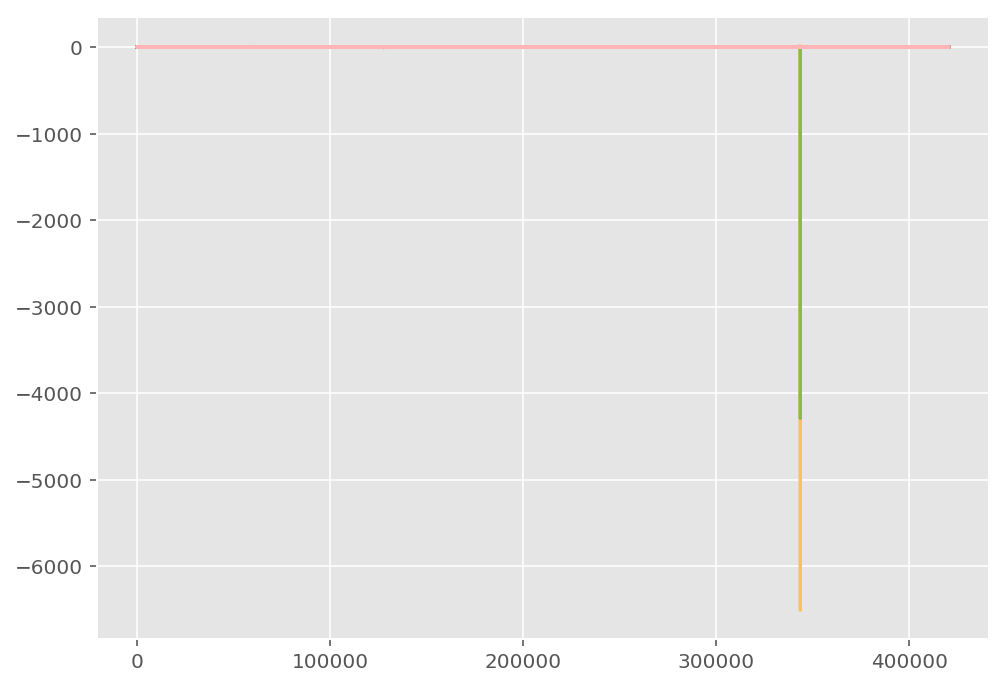

<Figure size 432x308.571 with 0 Axes>

In [49]:
temp = float_data[:, ]

fig = plt.figure(figsize=(6, 6/1.4))
plt.figure(figsize=(8, 8/1.4))
plt.plot(range(len(temp)), temp)
plt.show()

# Look at only a portion of the data

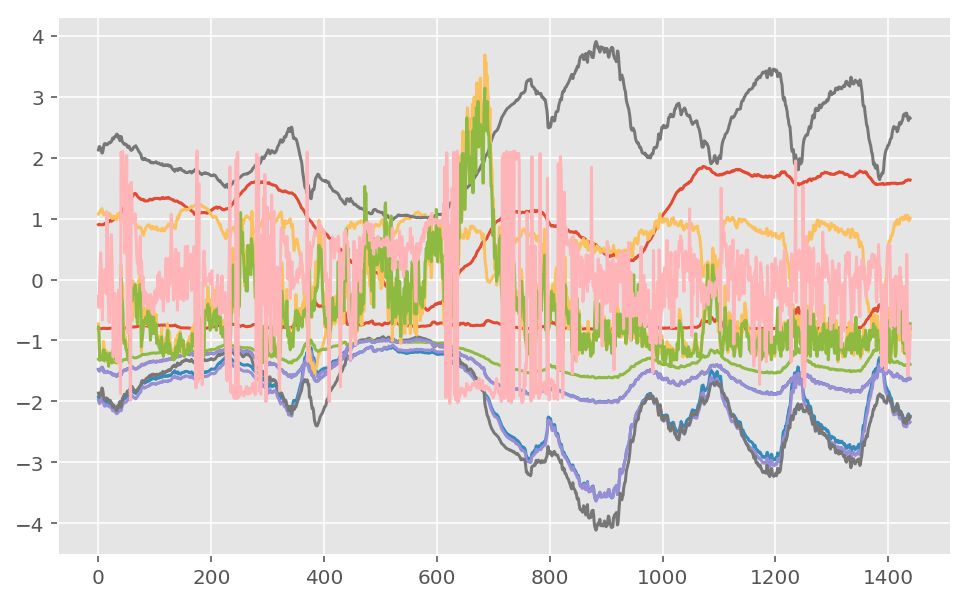

In [50]:
plt.figure(figsize=(8, 8/1.618))
plt.plot(range(1440), temp[:1440], linewidth=1, cmap='viridis')
plt.show()

# Normalize Data

In [24]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
        i = min_index + lookback
        while 1:
            if shuffle:
                rows = np.random.randint(
                    min_index + lookback, max_index, size=batch_size)
            else:
                if i + batch_size >= max_index:
                    i = min_index + lookback
                rows = np.arange(i, min(i + batch_size, max_index))
                i += len(rows)

                samples = np.zeros((len(rows)),
                                   lookback // step,
                                   data.shape[-1])
                targets = np.zeros((len(rows),))
                for j, row in enumerate(rows):
                    indices = range(rows[j] - lookback, rows[j], step)
                    samples[j] = data[indices]
                    targets[j] = data[rows[j] + delay][1]
                yield samples, targets
            

In [ ]:
lookback = 1440
step = 4
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [ ]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
        print(np.mean(batch_maes))

evaluate_naive_method()
celsius_mae = 0.29 * std[1]

# A basic machine-learning approach

In [ ]:
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
mode.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop, loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_step=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Validation loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# training and evaluating a simple 1D convnet on the Jena data
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_step1=val_steps)

                        